In [1]:
### Grading script code 
### You don't need to read this, proceed to the next cell
import sys
import functools
ipython = get_ipython()

def set_traceback(val):
    method_name = "showtraceback"
    setattr(
        ipython,
        method_name,
        functools.partial(
            getattr(ipython, method_name),
            exception_only=(not val)
        )
    )

class AnswerError(Exception):
  def __init__(self, message):
    pass

def exec_test(f, question):
    try:
        f()
        print(question + " Pass")
    except:
        set_traceback(False) # do not remove
        raise AnswerError(question + " Fail")

# Week 9 Problem Set

## Cohort Session

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**CS0.** *Plot:* Read data for Boston Housing Prices and write a function `get_features_targets()` to get the columns for the features and the targets from the input argument data frame. The function should take in Pandas' dataframe and two lists. The first list is for the feature names and the other list is for the target names. 

We will use the following columns for our test cases:
- x data: RM column - use z normalization (standardization)
- y data: MEDV column

**Make sure you return a new data frame for both the features and the targets.**

We will normalize the feature using z normalization. Plot the data using scatter plot. 



In [3]:
def normalize_z(dfin):
    dfout = pd.DataFrame()
    mean = dfin.mean(axis=0) 
    std = dfin.std(axis=0)  
    dfout = ((dfin - mean)/std)
    return dfout

def normalize_minmax(dfin):
    dfout = dfin.copy()
    min_df = dfout.min(axis=0)
    max_df = dfout.max(axis=0)     
    dfout = (dfout - min_df) / (max_df - min_df)
    return dfout

In [4]:
def get_features_targets(df, feature_names, target_names):
    df_feature = df[feature_names]
    df_target = df[target_names]
    return df_feature, df_target

In [5]:
df = pd.read_csv("housing_processed.csv")
df_feature, df_target = get_features_targets(df,["RM"],["MEDV"])
df_feature = normalize_z(df_feature)

assert isinstance(df_feature, pd.DataFrame)
assert isinstance(df_target, pd.DataFrame)
assert np.isclose(df_feature.mean(), 0.0)
assert np.isclose(df_feature.std(), 1.0)
assert np.isclose(df_target.mean(), 22.532806)
assert np.isclose(df_target.std(), 9.1971)


In [6]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


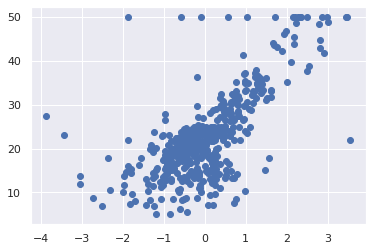

In [7]:
sns.set()
plt.scatter(df_feature, df_target)

**CS1.** *Cost Function:* Write a function `compute_cost()` to compute the cost function of a linear regression model. The function should take in two 2-D numpy arrays. The first one is the matrix of the linear equation and the second one is the actual target value.

Recall that:

$$J(\hat{\beta}_0, \hat{\beta}_1) = \frac{1}{2m}\Sigma^m_{i=1}\left(\hat{y}(x^i)-y^i\right)^2$$

where

$$\hat{y}(x^i) = \hat{\beta}_0 + \hat{\beta}_1 x^i$$

The function should receive a numpy array, so we will need to convert to numpy array and change the shape. To do this, we will create three other functions:
- `calc_linear(X, b)`: which is used to calculate the $\hat{y} = Xb$ vector.
- `prepare_feature(df)`: which takes in a data frame for the feature. The function should convert the data frame to a numpy array and change it into a column vector. The function should also add a column of constant 1s in the first column.
- `prepare_target(df)`: which takes in a data frame for the target. The function should simply convert the data frame to a numpy array and change it into column vectors. **The function should be able to handle if the data frame has more than one column.**

You can use the following methods in your code:
- `df.to_numpy()`: which is to convert a Pandas data frame to Numpy array.
- `np.reshape(row, col)`: which is to reshape the numpy array to a particular shape.
- `np.concatenate((array1, array2), axis)`: which is to join a sequence of arrays along an existing axis.
- `np.matmul(array1, array2)`: which is to do matrix multiplication on two Numpy arrays.


In [8]:
def calc_linear(X, beta):
    # This is to get a vector reprennting Y hat, i.e predicted value for each x_i or data point.
    # in mul lin reg this beta is a vector as well! Its dimensions are n rows x 1
    # X needs to be a matrix made of m rows for each data point and n columns for each independent variable
    return np.matmul(X, beta)

In [9]:
def compute_cost(X, y, beta):
    m = X.shape[0]
    # beta is a constant in linear regression but a vector in mul linreg. Will implement mul linreg version here
    y_hat = calc_linear(X, beta)
    J = 1/(2*m) * np.matmul( np.transpose(y_hat - y) , (y_hat - y))
    # This one does not work for 
#     J = 1/(2*m) * np.sum((calc_linear(X, beta) - y)**2)
    # J is a number, not a vector, but the calculations are vectorized
    return J


In [10]:
def prepare_feature(df_feature):
    # this is to convert table of x independent variables to X matrix, hence first column is all ones as x_0=1
    np_feature = df_feature.to_numpy()
    np_m = np_feature.shape[0]
    if np_feature.ndim == 1:  # we need increase dimensions, otherwise, it should be ready to concat alr
        np_feature = np_feature.reshape(np_m, 1)  # has to be same dim for concat with axis to work
    
    # create one row vector of ones, and concat along axis=1 (or column) of the np_feature.
    # ones represent the constant where x_0 = 1
    big_X = np.concatenate((np.ones((np_m, 1), dtype=float), np_feature), axis=1)    # OI, use np.ones instead of np.zeroes
    # np.zeroes need specify the shape else instead of matrix of shape (506,1) is a vector of shape (506,)
    return big_X

In [11]:
def prepare_target(df_target):
    # this is for the y dependent variable to be predicted
    np_target = df_target.to_numpy()
    return np_target

In [12]:
X = prepare_feature(df_feature)
target = prepare_target(df_target)

assert isinstance(X, np.ndarray)
assert isinstance(target, np.ndarray)
assert X.shape == (506, 2)
assert target.shape == (506, 1)

In [13]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [14]:
# print(X)
beta = np.zeros((2,1))
J = compute_cost(X, target, beta)
print(J)
assert np.isclose(J, 296.0735)

beta = np.ones((2,1))
J = compute_cost(X, target, beta)
print(J)
assert np.isclose(J, 268.157)

beta = np.array([-1, 2]).reshape((2,1))
J = compute_cost(X, target, beta)
print(J)
assert np.isclose(J, 308.337)


[[296.0734585]]
[[268.15700515]]
[[308.33699449]]


In [15]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


**CS2.** *Gradient Descent:* Write a function called `gradient_descent()` that takes in these parameters:
- `X`: is a 2-D numpy array for the features
- `y`: is a vector array for the target
- `beta`: is a column vector for the initial guess of the parameters
- `alpha`: is the learning rate
- `num_iters`: is the number of iteration to perform

The function should return two numpy arrays:
- `beta`: is coefficient at the end of the iteration
- `J_storage`: is the array that stores the cost value at each iteration

You can use some of the following functions:
- `calc_linear(X, b)`: which is used to calculate $y = Xb$ vector.
- `np.matmul(array1, array2)`: which is to do matrix multiplication on two Numpy arrays.
- `compute_cost()`: which the function you created in the previous problem set to compute the cost.

In [16]:
def gradient_descent(X, y, beta, alpha, num_iters):
    # alpha is the step, beta is the start guess at first, then gradient descent will push its value such that J is minimized
    m = X.shape[0]  # rows of X
    J_storage = np.array([])
    for _ in range(num_iters):
        J_storage = np.concatenate((J_storage, (compute_cost(X, y, beta)).flatten()))  # flatten that bish, since compute cost returns 2d array of shape (1,1)
        beta = beta - (alpha / m) * np.matmul(np.transpose(X), (calc_linear(X, beta) - y))  # update beta per step
    return beta, J_storage

In [17]:
iterations = 1500
alpha = 0.01
beta = np.zeros((2,1))

beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)
print(beta)
assert np.isclose(beta[0], 22.5328)
assert np.isclose(beta[1], 6.3953)

[[22.53279993]
 [ 6.39529594]]


In [18]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [19]:
print(J_storage)

[296.0734585  290.6162208  285.26756628 ...  21.80027589  21.80027589
  21.80027589]


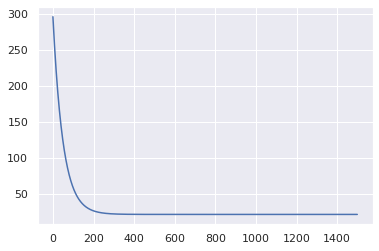

In [20]:
plt.plot(J_storage)

**CS3.** *Predict:* Write the function `predict()` that calculates the straight line equation given the features and its coefficient.
- `predict()`: this function should standardize the feature using z normalization, change it to a Numpy array, and add a column of constant 1s. You should use `prepare_feature()` for this purpose. Lastly, this function should also call `predict_norm()` to get the predicted y values.

You can use some of the following functions:
- `calc_linear(X, beta)`: which is used to calculate the predicted y after X has been normalized and added by a constant.
- `np.matmul(array1, array2)`: which is to do matrix multiplication on two Numpy arrays.
- `normalize_z(df)`: which is to do z normalization on the data frame.

In [32]:
def predict(df_feature, beta):
    norm_feature = normalize_z(df_feature)  # returns dataframe
    np_feature = prepare_feature(norm_feature)  # takes in df, returns np array with n + 1 column
    y_hat = calc_linear(np_feature, beta)  # np_feature is the X more or less, beta is the actual approx of beta, after Gradent Descent
    return y_hat
    

In [33]:
df_feature, buf = get_features_targets(df, ["RM"], [])
beta = [[22.53279993],[ 6.39529594]] # from previous result
pred = predict(df_feature, beta)

assert isinstance(pred, np.ndarray)
assert pred.shape == (506, 1)
assert np.isclose(pred.mean(), 22.5328)
assert np.isclose(pred.std(), 6.38897)

In [23]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


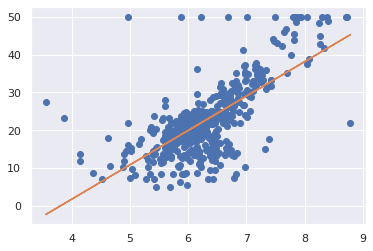

In [24]:
plt.plot(df_feature["RM"],target,'o')
plt.plot(df_feature["RM"],pred,'-')

**CS4.** *Splitting data:* Do the following tasks:
- Read RM as the feature and MEDV as the target from the data frame.
- Use Week 9's function `split_data()` to split the data into train and test using `random_state=100` and `test_size=0.3`. 
- Normalize and prepare the features and the target.
- Use the training data set and call `gradient_descent()` to obtain the `theta`.
- Use the test data set to get the predicted values.

You need to replace the `None` in the code below with other a function call or any other Python expressions. 

In [25]:
def split_data(df_feature, df_target, random_state=None, test_size=0.5):
    # df.sample and df.drop can also do this 
    np.random.seed(random_state)
    
    df_feature_rows = df_feature.shape[0]
    df_target_rows = df_target.shape[0]
    
    df_feature_split = int(test_size * df_feature_rows)
    df_target_split = int(test_size * df_target_rows)
    
    df_feature_rando = np.random.choice(df_feature_rows, size=df_feature_rows, replace=False)
#      df_target_rando = np.random.choice(df_target_rows, size=df_target_rows, replace=False)
    
    
    df_feature_test = df_feature.iloc[df_feature_rando[:df_feature_split]]   # split the randomized index and use to get values in the idx rows
    df_feature_train = df_feature.iloc[df_feature_rando[df_feature_split:]]
    
    df_target_test = df_target.iloc[df_feature_rando[:df_target_split]]
    df_target_train = df_target.iloc[df_feature_rando[df_target_split:]]
    
    return df_feature_train, df_feature_test, df_target_train, df_target_test


In [42]:
# get features and targets from data frame
df_feature, df_target = get_features_targets(df, ["RM"], ["MEDV"])

# split the data into training and test data sets, 70-30 train test split
df_feature_train, df_feature_test, df_target_train, df_target_test = split_data(df_feature, df_target, test_size=0.3, random_state=100)

# normalize the feature using z normalization
df_feature_train_z = normalize_z(df_feature_train)  

# 70% of data, target is the y and feature is the X
X = prepare_feature(df_feature_train_z)  # add the extra column of 1
target = prepare_target(df_target_train) 

iterations = 1500 
alpha = 0.01
beta = np.zeros((2,1))  # initial guess

# call the gradient_descent function
beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)

# call the predict method to get the predicted values, predict on the 30% of data i.e feature_test and target_test
pred = predict(df_feature_test, beta)  # pred is the bunch of y that we compare against target_test

In [43]:

assert isinstance(pred, np.ndarray)
print(pred.shape)
print(pred.mean())
print(pred.std())


(151, 1)
22.668162584123536
6.2572645665743565


In [44]:

assert isinstance(pred, np.ndarray)
assert pred.shape == (151, 1)
assert np.isclose(pred.mean(), 22.66816)
assert np.isclose(pred.std(), 6.257265)


In [45]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


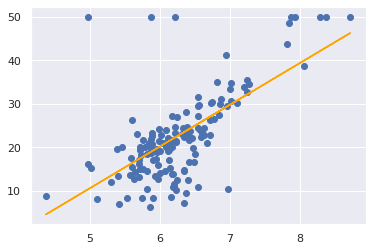

In [46]:
plt.scatter(df_feature_test, df_target_test)
plt.plot(df_feature_test, pred, color="orange")

**CS5.** *R2 Coefficient of Determination:* Write a function to calculate the coefficient of determination as given by the following equations.

$$r^2 = 1 - \frac{SS_{res}}{SS_{tot}}$$

where

$$SS_{res} = \Sigma_{i=1}^n (y_i - \hat{y}_i)^2$$ 

where $y_i$ is the actual target value and $\hat{y}_i$ is the predicted target value.

$$SS_{tot} = \Sigma_{i=1}^n (y_i - \overline{y})^2$$

where 
$$ \overline{y} = \frac{1}{n} \Sigma_{i=1}^n y_i$$
and $n$ is the number of target values.

You can use the following functions in your code:
- `np.mean(array)`: which is to get the mean of the array. You can also call it using `array.mean()`.
- `np.sum(array)`: which is to sum the array along a default axis. You can specify which axis to perform the summation.

In [47]:
def r2_score(y, ypred):
    y_mean = y.mean()
    ss_res = np.sum((y - ypred)**2)
    ss_tot = np.sum((y - y_mean)**2)
    return 1 - ss_res/ss_tot

In [48]:
target = prepare_target(df_target_test)
r2 = r2_score(target, pred)
print(r2)
assert np.isclose(r2, 0.45398)

0.4539807545406419


**CS6.** *Mean Squared Error:* Create a function to calculate the MSE as given below.

$$MSE = \frac{1}{n}\Sigma_{i=1}^n(y^i - \hat{y}^i)^2$$


In [49]:
def mean_squared_error(target, pred):
    n = target.shape[0]
    rss = np.sum((target - pred)**2)
    mse = rss / n
    return mse

In [50]:
mse = mean_squared_error(target, pred)
print(mse)
assert np.isclose(mse, 53.6375)

53.6374880298886


**CS8.** *Optional:* Redo the above tasks using Sci-kit learn libraries. You will need to use the following:
- [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
- [r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)
- [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [52]:
# Read the CSV and extract the features

df = pd.read_csv("housing_processed.csv")
df_feature, df_target = get_features_targets(df,["RM"],["MEDV"])

# normalize
df_feature = normalize_z(df_feature)


In [53]:
# Split the data into training and test data set using scikit-learn function
df_feature_train, df_feature_test, df_target_train, df_target_test = train_test_split(df_feature, df_target, test_size=0.3, random_state=100)

# Instantiate LinearRegression() object
model = LinearRegression()

# Call the fit() method
model.fit(df_feature_train, df_target_train)

print(model.coef_, model.intercept_)
assert np.isclose(model.coef_,[6.05090511])
assert np.isclose(model.intercept_, 22.52999668)

[[6.05090511]] [22.52999668]


In [54]:
# Call the predict() method
pred = model.predict(df_feature_test)

print(type(pred), pred.mean(), pred.std())
assert isinstance(pred, np.ndarray)
assert np.isclose(pred.mean(), 22.361699)
assert np.isclose(pred.std(), 5.7011267)

<class 'numpy.ndarray'> 22.361699489356496 5.7011267141173


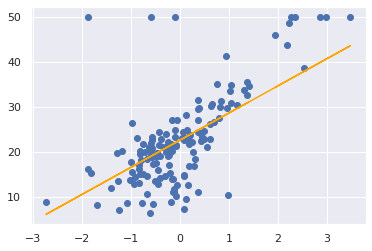

In [55]:
plt.scatter(df_feature_test, df_target_test)
plt.plot(df_feature_test, pred, color="orange")

In [56]:
r2 = r2_score(df_target_test, pred)
print(r2)
assert np.isclose(r2, 0.457647)

0.45764736329252076


In [57]:
mse = mean_squared_error(df_target_test, pred)
print(mse)
assert np.isclose(mse, 54.93216)

54.93216051758423
